In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# sample size
N = 115

In [7]:
# read data and separate experimental values in different ndarrays
# TODO: make reading using numpy, if we wouldn't need pandas at all
data = pd.read_csv('input_data/sample.csv')
sample_v, sample_E = np.array(data['v']), np.array(data['E'])

# ranked series (increasing order)
ranked_v, ranked_E = np.sort(sample_v), np.sort(sample_E)

# variation series
variation_v = np.array(np.unique(ranked_v, return_counts=True))
variation_E = np.array(np.unique(ranked_E, return_counts=True))


Bins number:  7 

Interval width v: 37.43
Edges v:  [331.   368.43 405.86 443.29 480.71 518.14 555.57 593.  ]
Frequency v:  [ 8  9 33 27 21 12  5]
Intervals medians v:  [349.71 387.14 424.57 462.   499.43 536.86 574.29]


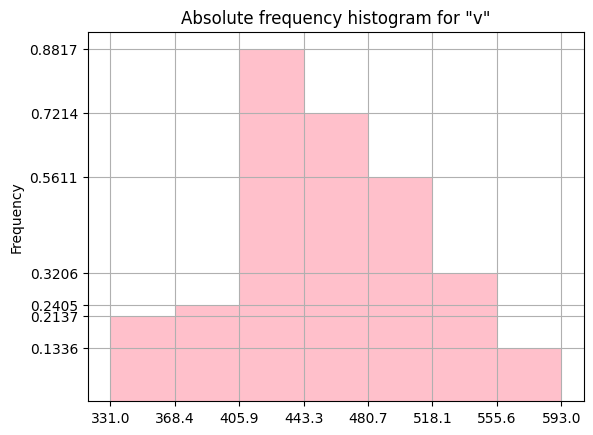

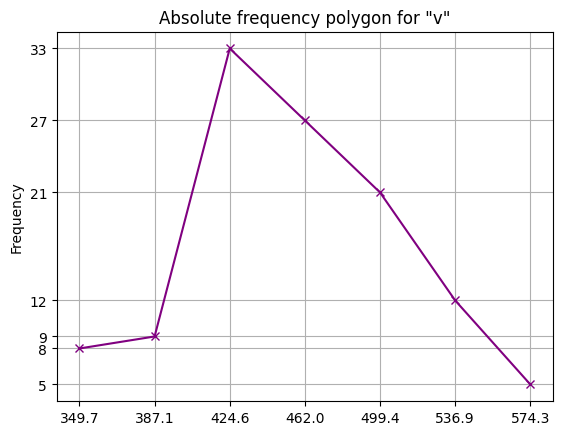

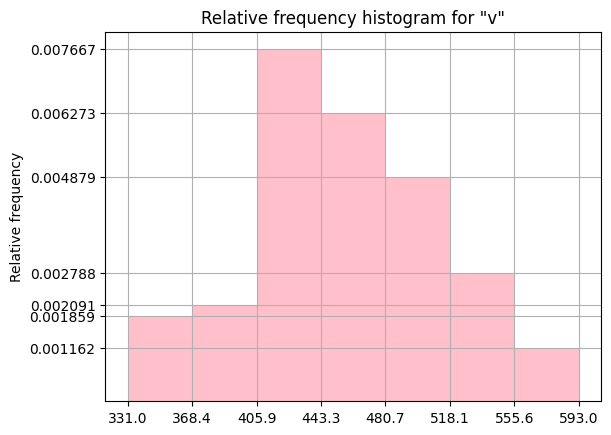

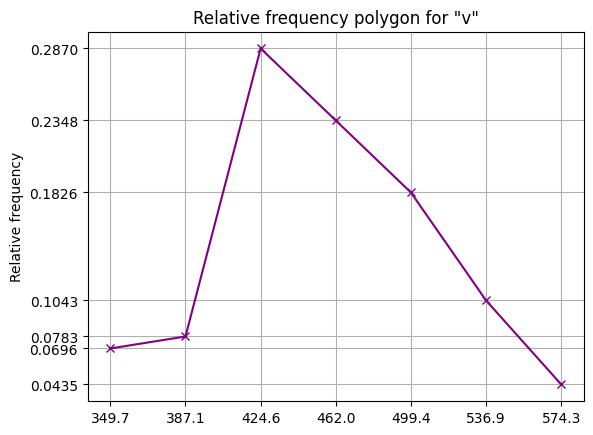

Interval width E: 17.83
Edges E:  [ 62.6   80.43  98.26 116.09 133.91 151.74 169.57 187.4 ]
Frequency E:  [ 2  7 21 38 29 15  3]
Intervals medians E:  [ 71.51  89.34 107.17 125.   142.83 160.66 178.49]


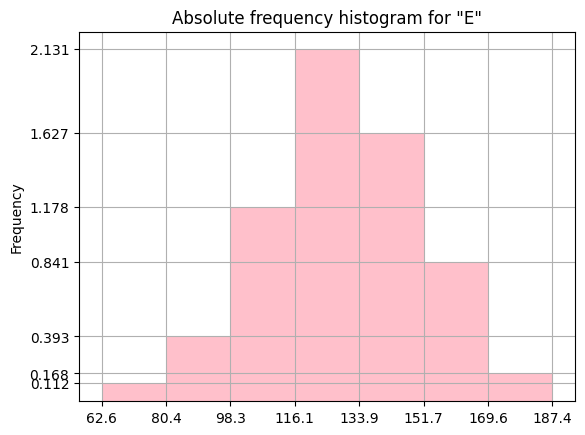

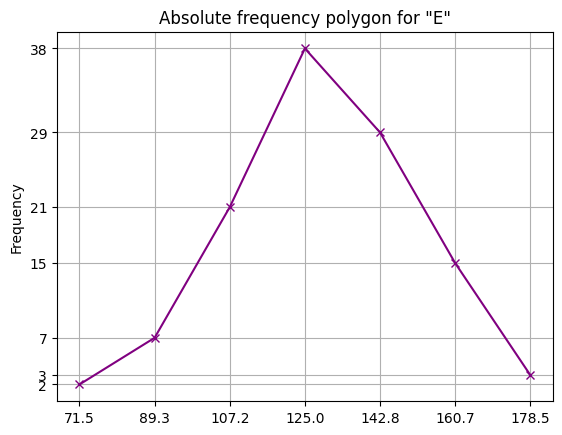

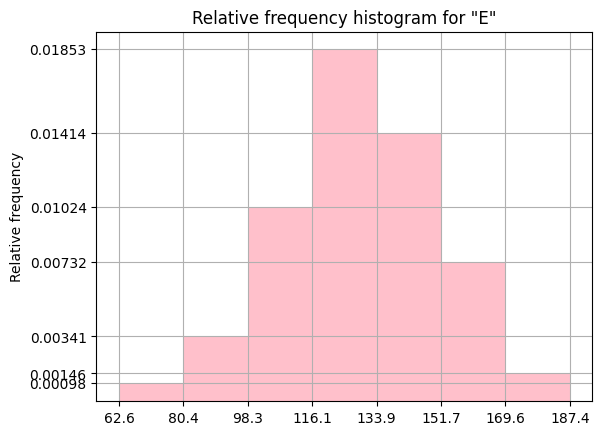

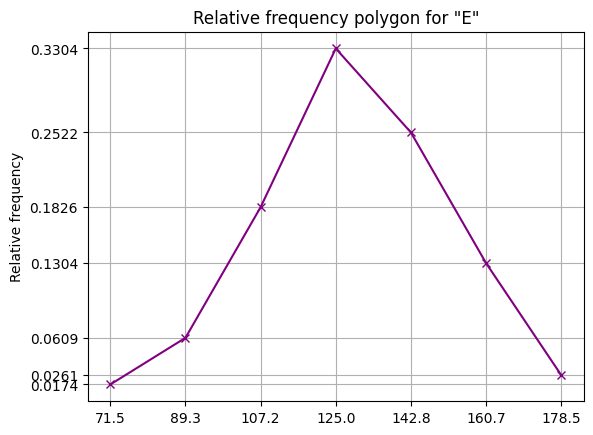

In [9]:
# interval series
def absolute_frequency_hist(edges, frequencies, width, medians, var):
    """Plot the absolute frequency histogram"""
    plt.title(f'Absolute frequency histogram for "{var}"')
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plt.xticks(edges)
    plt.yticks(frequencies / width)

    plt.bar(medians, frequencies / width, color='pink', width=width)
    plt.show()

def absolute_frequency_polygon(frequencies, medians, var):
    """Plot the absolute frequency polygon"""
    plt.title(f'Absolute frequency polygon for "{var}"')
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plt.xticks(medians)
    plt.yticks(frequencies)

    plt.plot(medians, frequencies, color='purple', marker='x')
    plt.show()


def relative_frequency_hist(edges, frequencies, width, 
                            medians, series_size, var):
    """Plot the relative frequency histogram"""
    plt.title(f'Relative frequency histogram for "{var}"')
    plt.ylabel('Relative frequency')
    plt.grid(True)
    
    plt.xticks(edges)
    plt.yticks(frequencies / (series_size * width))

    plt.bar(medians, frequencies / (series_size * width), 
            color='pink', width=width)
    plt.show()

def relative_frequency_polygon(frequencies, medians, series_size, var):
    """Plot the relative frequency polygon"""
    plt.title(f'Relative frequency polygon for "{var}"')
    plt.ylabel('Relative frequency')
    plt.grid(True)
    
    plt.xticks(medians)
    plt.yticks(frequencies / series_size)

    plt.plot(medians, frequencies / series_size, color='purple', marker='x')
    plt.show()
 
# calculate number of bins using Sturges' rule
bins_number = int(1 + 3.322 * np.log10(N))
interval_width_v = (ranked_v[-1] - ranked_v[0]) / bins_number
interval_width_E = (ranked_E[-1] - ranked_E[0]) / bins_number

# calculate frequencies and interval values
freq_v, edges_v = np.histogram(ranked_v, bins=bins_number)
freq_E, edges_E = np.histogram(ranked_E, bins=bins_number)

# intervals' medians
intervals_medians_v = (edges_v[1:] + edges_v[:-1]) / 2
intervals_medians_E = (edges_E[1:] + edges_E[:-1]) / 2

print("Bins number: ", np.round(bins_number, 2), '\n')
print("Interval width v:", np.round(interval_width_v, 2))
print("Edges v: ", np.round(edges_v, 2))
print("Frequency v: ", np.round(freq_v, 2))
print("Intervals medians v: ", np.round(intervals_medians_v, 2))

absolute_frequency_hist(edges_v, freq_v, interval_width_v, 
                        intervals_medians_v, var='v')
absolute_frequency_polygon(freq_v, intervals_medians_v, var='v')

relative_frequency_hist(edges_v, freq_v, interval_width_v, 
                        intervals_medians_v, N, var='v')
relative_frequency_polygon(freq_v, intervals_medians_v, N, var='v')

print("Interval width E:", np.round(interval_width_E, 2))
print("Edges E: ", np.round(edges_E, 2))
print("Frequency E: ", np.round(freq_E, 2))
print("Intervals medians E: ", np.round(intervals_medians_E, 2))

absolute_frequency_hist(edges_E, freq_E, interval_width_E, 
                        intervals_medians_E, var='E')
absolute_frequency_polygon(freq_E, intervals_medians_E, var='E')

relative_frequency_hist(edges_E, freq_E, interval_width_E, 
                        intervals_medians_E, N, var='E')
relative_frequency_polygon(freq_E, intervals_medians_E, N, var='E')
